1. Pixel-wise distances:

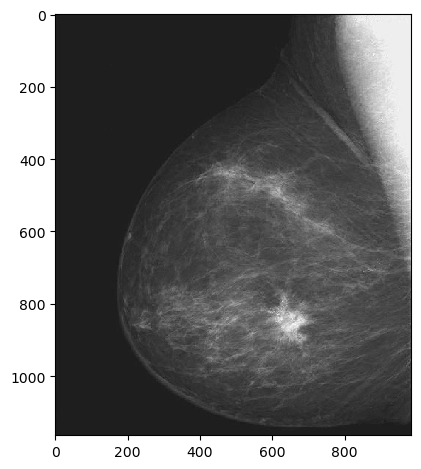

[[ 35  38  36 ... 238 238 238]
 [ 37  42  38 ... 238 238 238]
 [ 32  39  35 ... 238 238 238]
 ...
 [ 31  31  31 ...  30  30  30]
 [ 31  31  31 ...  30  30  30]
 [ 31  31  31 ...  30  30  30]]


In [6]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pyplot as plt

%matplotlib inline

I = sk.io.imread('/Users/khine/test.jpg') # read image using imread function
sk.io.imshow(I) # visualize image using imshow function
sk.io.show()
print(I)

In [7]:
I.shape
#row,col total

(1164, 984)

In [8]:
I.shape[0]
#row total

1164

In [9]:
I.shape[0]*I.shape[0]
#row * row

1354896

In [10]:
I.shape[1]*I.shape[1]

968256

In [11]:
#total number of pixels in image
#by multiplying pixel columns by pixel rows.
I.shape[0]*I.shape[1]
#1145376 pixels

1145376

Euclidean distance between two pixels:

In [12]:
from scipy.spatial.distance import pdist 
import numpy as np

X1 = np.array([10, 10]) # position of pixel 1  (row, col) [10,10] [q1,q2]
X2 = np.array([20, 20]) # position of pixel 2  (row, col) [20,20] [p1,p2]
X = [X1,X2]#[[10,10],[20,20]]
print(X)
Y = pdist(X, 'euclidean')
print("Y distance: {0}".format(Y))
print("Y distance: {}".format(*Y))
print('Euclidean distance={}'.format(*Y))

# which is equivalent to:
Y1 = np.sqrt(np.power(X1-X2,2).sum())
# 
# np.power(X1-X2,2) ----> (X1-X2)2

print('Y = {} and Y1 = {}'.format(*Y,Y1))

[array([10, 10]), array([20, 20])]
Y distance: [14.14213562]
Y distance: 14.142135623730951
Euclidean distance=14.142135623730951
Y = 14.142135623730951 and Y1 = 14.142135623730951


In [13]:
## Cityblock distance: 
Y = pdist(X, 'cityblock')
print('Cityblock distance={}'.format(*Y))

# Chessboard distance (Chevichev): 
Y = pdist(X, 'chebyshev')
print('Chessboard distance={}'.format(*Y))

Cityblock distance=20.0
Chessboard distance=10.0


Cityblock distance=20.0
Chessboard distance=10.0
The euclidean distance transform
Assigns values of the euclidean distance:


where 
 is the background point (value 0) with the smallest Euclidean distance to input points 
, and d is the number of dimensions.

In [16]:
a = np.array(([0,1,1,1,1],
                  [0,0,1,1,1],
                  [0,1,1,1,1],
                  [0,1,1,1,0],
                  [0,1,1,0,0]))
print("a",a)
from scipy import ndimage
edt = ndimage.distance_transform_edt(a)
edt

a [[0 1 1 1 1]
 [0 0 1 1 1]
 [0 1 1 1 1]
 [0 1 1 1 0]
 [0 1 1 0 0]]


array([[0.        , 1.        , 1.41421356, 2.23606798, 3.        ],
       [0.        , 0.        , 1.        , 2.        , 2.        ],
       [0.        , 1.        , 1.41421356, 1.41421356, 1.        ],
       [0.        , 1.        , 1.41421356, 1.        , 0.        ],
       [0.        , 1.        , 1.        , 0.        , 0.        ]])

In [ ]:
nrows, ncols = (200,200)
#is equal to 
#nrows = 200
#ncols = 200
row, col = np.ogrid[:nrows, :ncols]
#is equal to
#row = np.ogrid[:nrows]
#col = np.ogrid[:ncols]

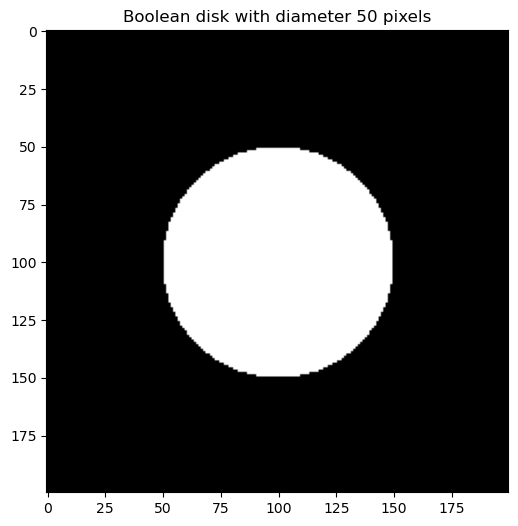

In [39]:
nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
# print(np.ogrid[:nrows])
# print(np.ogrid[:ncols])
cnt_row, cnt_col = nrows / 2, ncols / 2
#cnt_row = 100 , cnt_col = 100
disk_diameter = 50
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 < (disk_diameter)**2)
#print("1st",(row - cnt_row)**2)
#print("2nd",(col - cnt_col)**2)
#print((disk_diameter)**2)
#print(outer_disk_mask)

fig = plt.figure(figsize=(6,6))
plt.imshow(outer_disk_mask,cmap=plt.cm.gray)
plt.title('Boolean disk with diameter {} pixels'.format(disk_diameter))
plt.show()

In [36]:
r,c = np.ogrid[:5,:5]
print(r)
print(c)

[[0]
 [1]
 [2]
 [3]
 [4]]
[[0 1 2 3 4]]


In [37]:
(row - cnt_row)**2 + (col - cnt_col)**2

array([[20000., 19801., 19604., ..., 19409., 19604., 19801.],
       [19801., 19602., 19405., ..., 19210., 19405., 19602.],
       [19604., 19405., 19208., ..., 19013., 19208., 19405.],
       ...,
       [19409., 19210., 19013., ..., 18818., 19013., 19210.],
       [19604., 19405., 19208., ..., 19013., 19208., 19405.],
       [19801., 19602., 19405., ..., 19210., 19405., 19602.]])

In [38]:
(disk_diameter)**2

2500

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


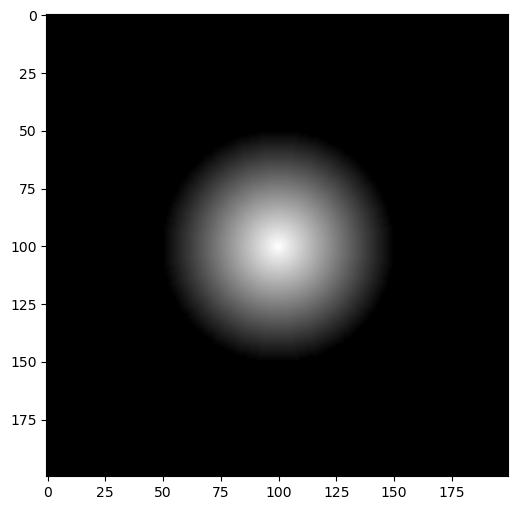

In [40]:
from scipy import ndimage
edt = ndimage.distance_transform_edt(outer_disk_mask)
print(edt)
fig = plt.figure(figsize=(6,6))
plt.imshow(edt,cmap=plt.cm.gray)
plt.show()

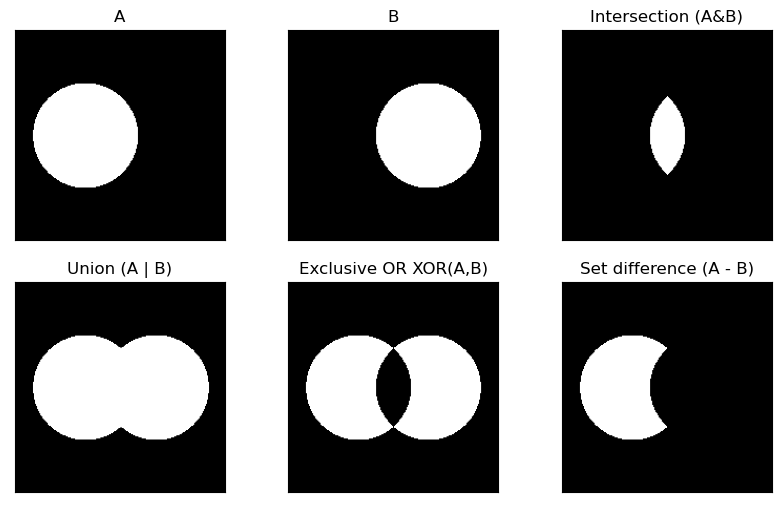

In [57]:
nrows, ncols = (200,200)
row, col = np.ogrid[:nrows, :ncols]
disk_diameter = 50

cnt_row1, cnt_col1 = nrows / 2, ncols / 3
outer_disk_mask1 = ((row - cnt_row1)**2 + (col - cnt_col1)**2 < (disk_diameter)**2)

cnt_row2, cnt_col2 = nrows / 2, 2*ncols / 3
outer_disk_mask2 = ((row - cnt_row2)**2 + (col - cnt_col2)**2 < (disk_diameter)**2)

# Intersection (logical AND): 
I_and = outer_disk_mask1 & outer_disk_mask2
#*
# &

# Union (logical OR): 
I_or = outer_disk_mask1 | outer_disk_mask2
#|
# Exclusive OR xor(A,B): Pixels that are in A but not in B
I_diff1 = np.logical_xor(outer_disk_mask1, outer_disk_mask2)

# Difference (A-B)=A&(not(B)): Pixels that are in A but not in B
I_diff2 = outer_disk_mask1 & np.logical_not(outer_disk_mask2)

fig = plt.figure(figsize=(10, 6))
plt.subplot(231),plt.imshow(outer_disk_mask1, cmap = 'gray')
plt.title('A'), plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(outer_disk_mask2, cmap = 'gray')
plt.title('B'), plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(I_and, cmap = 'gray')
plt.title('Intersection (A&B)'), plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(I_or, cmap = 'gray')
plt.title('Union (A | B)'), plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(I_diff1, cmap = 'gray')
plt.title('Exclusive OR XOR(A,B)'), plt.xticks([]), plt.yticks([])
plt.subplot(236),plt.imshow(I_diff2, cmap = 'gray')
plt.title('Set difference (A - B)'), plt.xticks([]), plt.yticks([])
plt.show()

In [41]:
I.dtype

dtype('uint8')

Convertion between types:

In [60]:
from skimage import img_as_int,img_as_float

Iint = img_as_int(I)
Ifloat = img_as_float(I)
print("Iint",Iint)
print("Ifloat",Ifloat)

print('uint8 range = {} - {}'.format(I.min(),I.max()))
print(I.min())
#I.min - I.max
print('Int range = {} - {}'.format(Iint.min(),Iint.max()))
print('Float range = {} - {}'.format(Ifloat.min(),Ifloat.max()))

Iint [[ 4497  4883  4626 ... 30583 30583 30583]
 [ 4754  5397  4883 ... 30583 30583 30583]
 [ 4112  5011  4497 ... 30583 30583 30583]
 ...
 [ 3983  3983  3983 ...  3855  3855  3855]
 [ 3983  3983  3983 ...  3855  3855  3855]
 [ 3983  3983  3983 ...  3855  3855  3855]]
Ifloat [[0.1372549  0.14901961 0.14117647 ... 0.93333333 0.93333333 0.93333333]
 [0.14509804 0.16470588 0.14901961 ... 0.93333333 0.93333333 0.93333333]
 [0.1254902  0.15294118 0.1372549  ... 0.93333333 0.93333333 0.93333333]
 ...
 [0.12156863 0.12156863 0.12156863 ... 0.11764706 0.11764706 0.11764706]
 [0.12156863 0.12156863 0.12156863 ... 0.11764706 0.11764706 0.11764706]
 [0.12156863 0.12156863 0.12156863 ... 0.11764706 0.11764706 0.11764706]]
uint8 range = 19 - 255
19
Int range = 2441 - 32767
Float range = 0.07450980392156863 - 1.0


In [66]:
Isum = I + I
#print(I)
print(Isum)

[[ 70  76  72 ... 220 220 220]
 [ 74  84  76 ... 220 220 220]
 [ 64  78  70 ... 220 220 220]
 ...
 [ 62  62  62 ...  60  60  60]
 [ 62  62  62 ...  60  60  60]
 [ 62  62  62 ...  60  60  60]]


4. Intensity transformations:
Gamma correction:
, where the non-negative real input value 
 is raised to the power 
 and multiplied by the constant A, to get the output value 
. In the common case of A = 1, inputs and outputs are typically in the range 0–1.

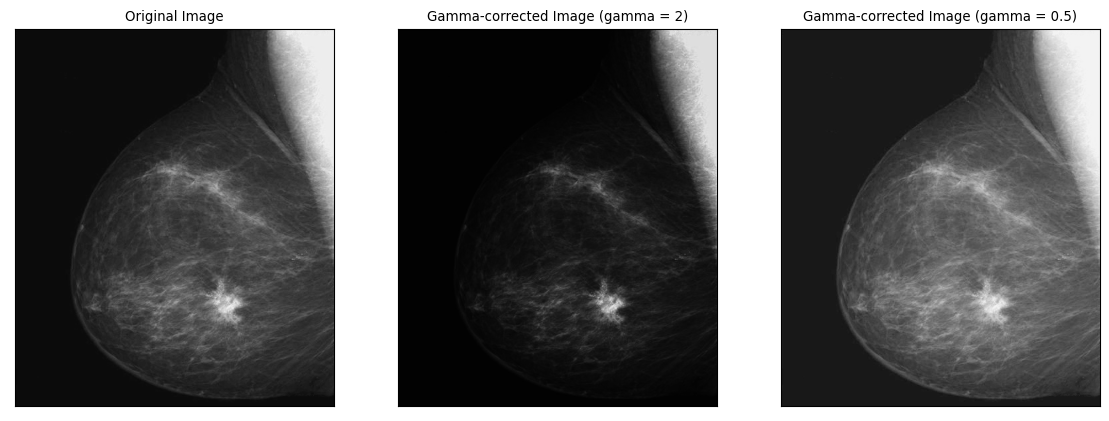

In [44]:
from skimage import data, exposure, img_as_float
I_gamma_corrected_2 = exposure.adjust_gamma(I, 2)
I_gamma_corrected_05 = exposure.adjust_gamma(I, 0.5)

fig = plt.figure(figsize=(14, 6))
plt.subplot(131),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(I_gamma_corrected_2, cmap = 'gray')
plt.title('Gamma-corrected Image (gamma = 2)'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(I_gamma_corrected_05, cmap = 'gray')
plt.title('Gamma-corrected Image (gamma = 0.5)'), plt.xticks([]), plt.yticks([])
plt.show()

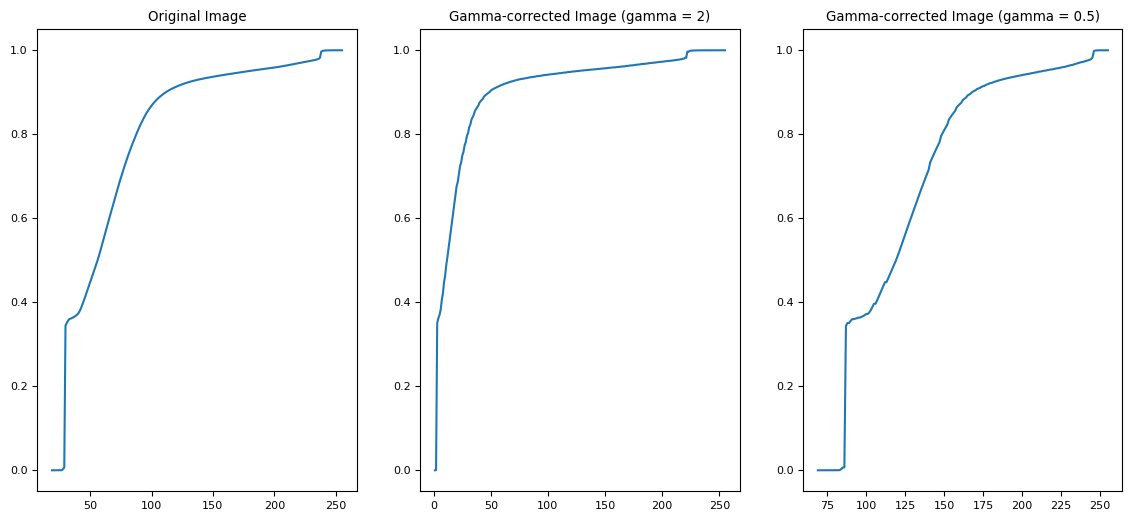

In [45]:
 from skimage import exposure

I_cdf, bins = exposure.cumulative_distribution(I)
I1_cdf, bins1 = exposure.cumulative_distribution(I_gamma_corrected_2)
I2_cdf, bins2 = exposure.cumulative_distribution(I_gamma_corrected_05)

    
fig = plt.figure(figsize=(14, 6))
plt.subplot(131),plt.plot(bins, I_cdf)
plt.title('Original Image')
plt.subplot(132),plt.plot(bins1, I1_cdf)
plt.title('Gamma-corrected Image (gamma = 2)')
plt.subplot(133),plt.plot(bins2, I2_cdf)
plt.title('Gamma-corrected Image (gamma = 0.5)')
plt.show()

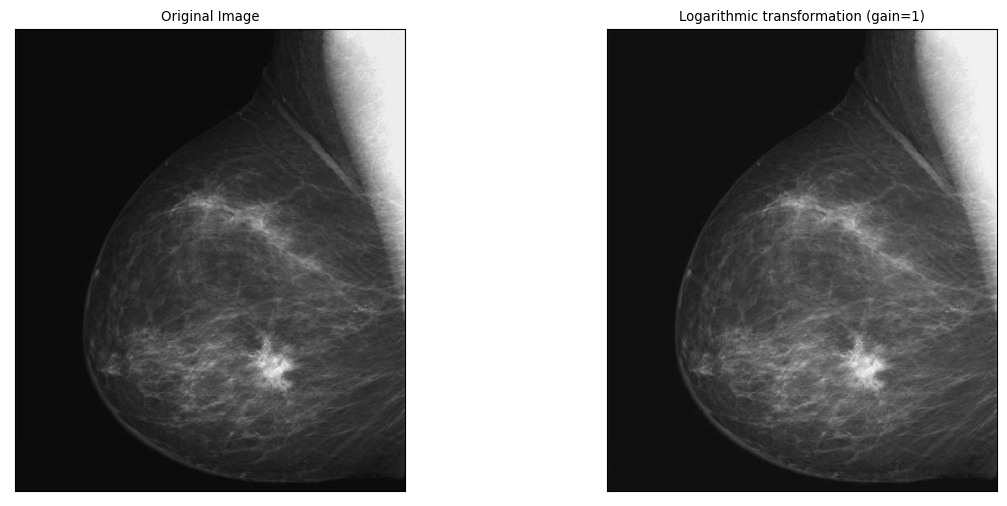

In [46]:
I_logarithmic_corrected = exposure.adjust_log(I, 1)
fig = plt.figure(figsize=(14, 6))
plt.subplot(121),plt.imshow(I, cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(I_logarithmic_corrected, cmap = 'gray')
plt.title('Logarithmic transformation (gain=1)'), plt.xticks([]), plt.yticks([])
plt.show()

Compare Gamma correction and logarithmic transformation:

C:\Users\khine\AppData\Local\Temp\ipykernel_18480\1276527623.py:49: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  axes = np.zeros((2, 3), dtype=np.object)


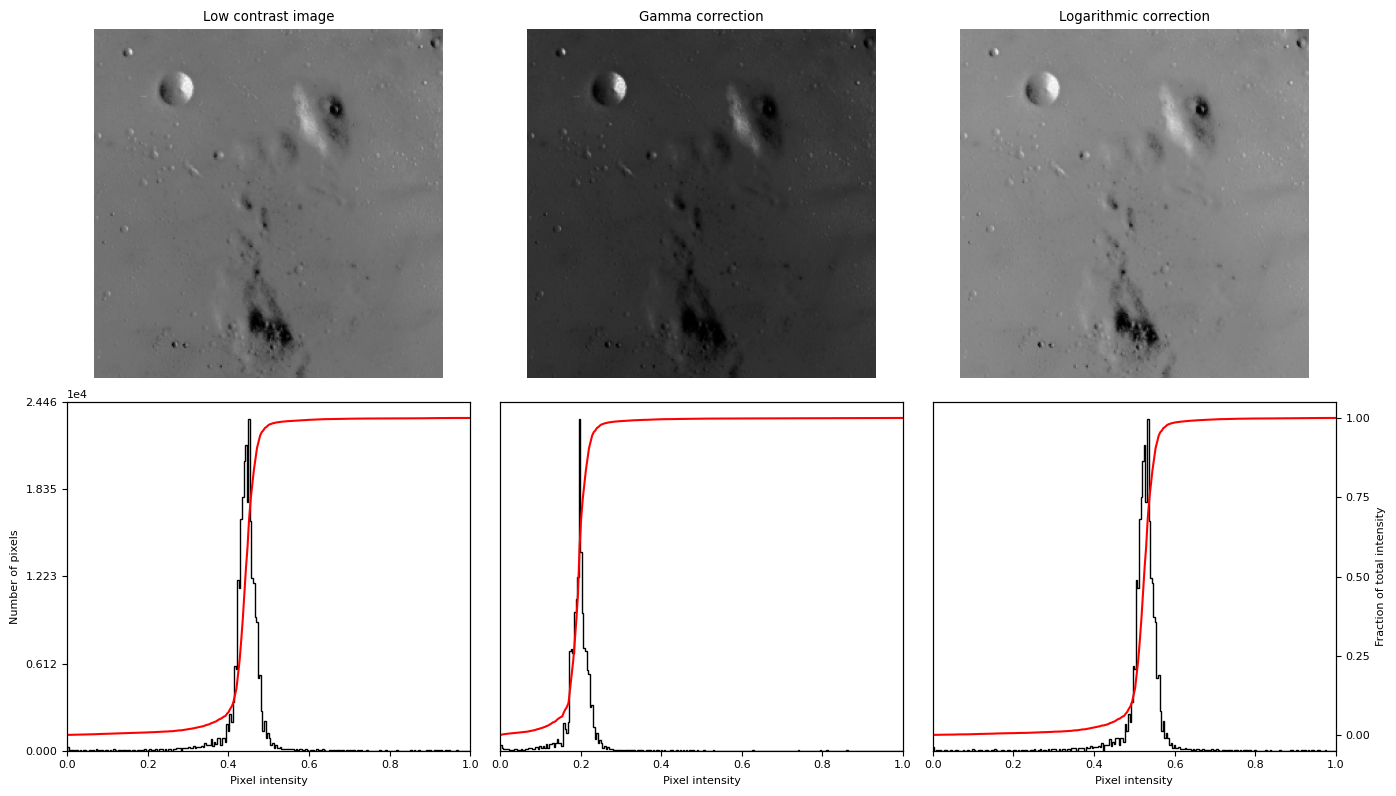

In [47]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = data.moon()

# Gamma
gamma_corrected = exposure.adjust_gamma(img, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(img, 1)

# Display results
fig = plt.figure(figsize=(14, 8))
axes = np.zeros((2, 3), dtype=np.object)
axes[0, 0] = plt.subplot(2, 3, 1)
axes[0, 1] = plt.subplot(2, 3, 2, sharex=axes[0, 0], sharey=axes[0, 0])
axes[0, 2] = plt.subplot(2, 3, 3, sharex=axes[0, 0], sharey=axes[0, 0])
axes[1, 0] = plt.subplot(2, 3, 4)
axes[1, 1] = plt.subplot(2, 3, 5)
axes[1, 2] = plt.subplot(2, 3, 6)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(gamma_corrected, axes[:, 1])
ax_img.set_title('Gamma correction')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(logarithmic_corrected, axes[:, 2])
ax_img.set_title('Logarithmic correction')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()


5. Pixel statistics and image histograms:

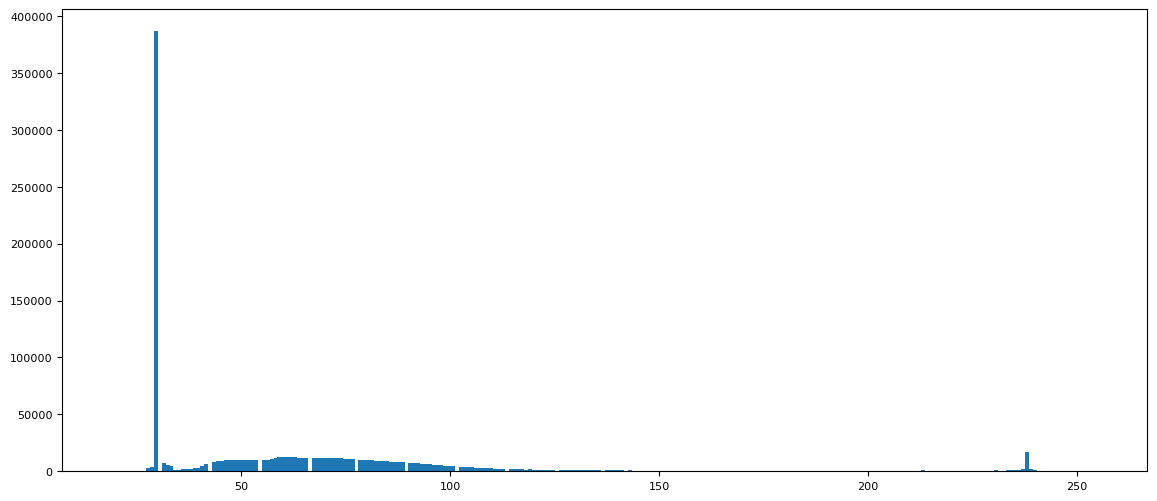

In [48]:
import matplotlib.pyplot as plt
import numpy as np 

# reshape the uint8 image as 1d array:
v = I.reshape(I.shape[0]*I.shape[1],1)
# keep only pixels with a value higher than zero: 
v = v[v>0]
fig = plt.figure(figsize=(14, 6))
plt.hist(v, bins=256,density=False)
plt.show()

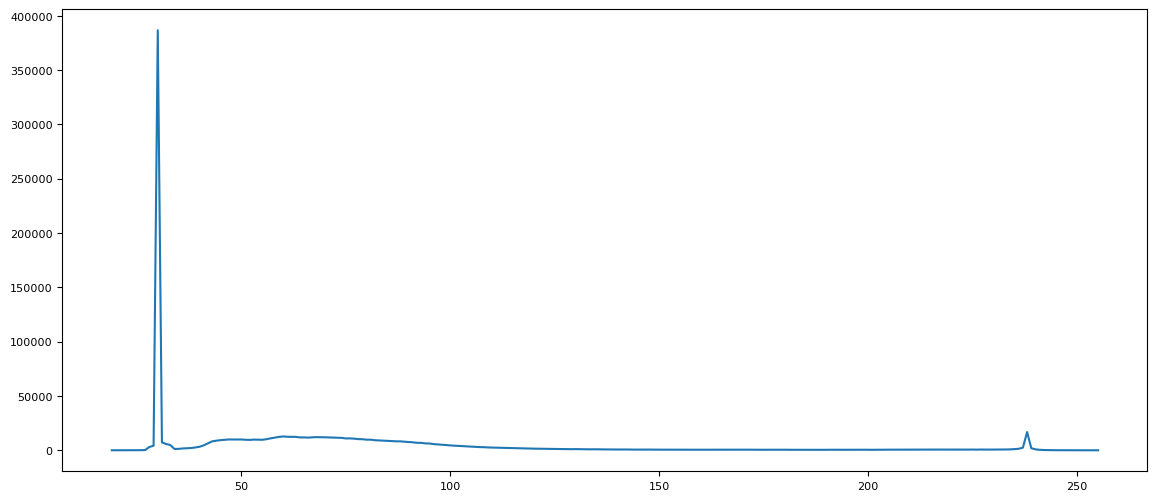

In [49]:
from skimage import exposure
counts,bins = exposure.histogram(I, nbins=255)
fig = plt.figure(figsize=(14, 6))
plt.plot(bins, counts)
plt.show()

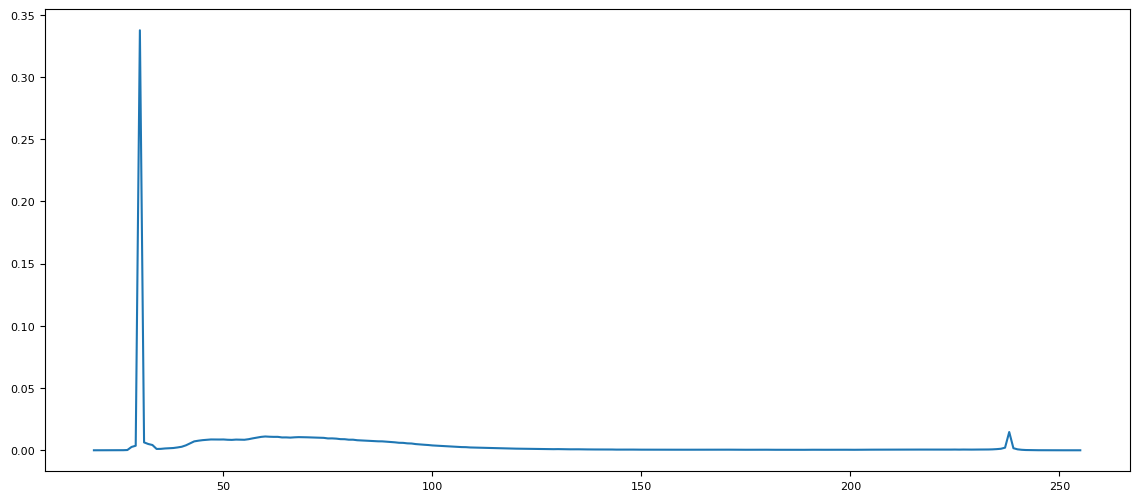

In [50]:
from skimage import exposure
counts,bins = exposure.histogram(I, nbins=255)
p = counts/(I.shape[0]*I.shape[1])
fig = plt.figure(figsize=(14, 6))
plt.plot(bins, p)
plt.show()

Global mean, median and standard deviation of an image:

In [51]:
print('Global mean of the image is = {}'.format(v.mean()))
print('Global std of the image is = {}'.format(v.std()))
print('Global median of the image is = {}'.format(np.median(v)))

Global mean of the image is = 66.62646502109351
Global std of the image is = 46.3650369900765
Global median of the image is = 57.0
